In [1]:
import sys
sys.path.append('/mnt/cocoapi/PythonAPI/')

from pycocotools.coco import COCO
import os, sys, zipfile
import urllib.request
import shutil
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
import json
from pathlib import Path
import csv
import cv2
from random import randrange

In [2]:
output_dir = '/mnt/data'
image_set = 'train'
anno_file = Path(output_dir, 'annotations', image_set+'.json')
coco=COCO(anno_file.as_posix())

loading annotations into memory...
Done (t=3.21s)
creating index...
index created!


In [4]:
coco.getCatIds()

[1, 2, 3, 4, 5]

In [21]:
blouse_cat = coco.cats[1]
print(blouse_cat)

blouse_cat['keypoints'] = ['neckline_left', 'neckline_right', 'center_front', 'shoulder_left', 
                             'shoulder_right', 'armpit_left', 'armpit_right', 'cuff_left_in', 
                             'cuff_left_out', 'cuff_right_in', 'cuff_right_out', 'top_hem_left', 
                             'top_hem_right']
blouse_cat['skeleton'] = [[1, 2], [1, 3], [2, 3], [1, 4], [4, 11], [6, 7], [6, 10], [2, 5], 
                           [5, 13]]

coco.cats[1] = blouse_cat 
print(coco.cats[1])

{'supercategory': 'blouse', 'id': 1, 'name': 'blouse', 'keypoints': ['neckline_left', 'neckline_right', 'center_front', 'shoulder_left', 'shoulder_right', 'armpit_left', 'armpit_right', 'cuff_left_in', 'cuff_left_out', 'cuff_right_in', 'cuff_right_out', 'top_hem_left', 'top_hem_right'], 'skeleton': [[1, 2], [1, 3], [2, 3], [1, 4], [4, 11], [6, 7], [6, 10], [2, 5], [5, 13], [7, 12], [4, 6], [5, 7]]}
{'supercategory': 'blouse', 'id': 1, 'name': 'blouse', 'keypoints': ['neckline_left', 'neckline_right', 'center_front', 'shoulder_left', 'shoulder_right', 'armpit_left', 'armpit_right', 'cuff_left_in', 'cuff_left_out', 'cuff_right_in', 'cuff_right_out', 'top_hem_left', 'top_hem_right'], 'skeleton': [[1, 2], [1, 3], [2, 3], [1, 4], [4, 11], [6, 7], [6, 10], [2, 5], [5, 13]]}


15123905676769761541
{'height': 512, 'width': 341, 'file_name': '17b522a66dfc3acb1b8e9bfce063c603.jpg', 'id': 15123905676769761541, 'category': 'blouse'}
/mnt/data/images/blouse/17b522a66dfc3acb1b8e9bfce063c603.jpg
[1]
[{'segmentation': [], 'bbox': [28, 10, 289, 434], 'keypoints': [130, 16, 2, 185, 10, 2, 162, 104, 2, 37, 93, 2, 300, 85, 2, 79, 162, 2, 243, 150, 1, -1, -1, 0, -1, -1, 0, 56, 439, 2, 28, 434, 2, 274, 444, 2, 317, 431, 2, 99, 376, 2, 234, 382, 2, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0, -1, -1, 0], 'iscrowd': 0, 'image_id': 15123905676769761541, 'category_id': 1, 'id': 8300001400808172027, 'area': 125426}]


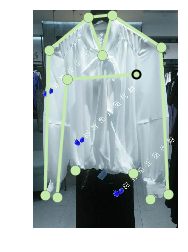

In [22]:
# blouse
img_id = 15123905676769761541
print(img_id)
img_anno = coco.loadImgs([img_id])[0]
print(img_anno)
img_path = Path(output_dir, 'images', img_anno['category'], img_anno['file_name'])
print(img_path)
assert img_path.exists(), 'image not exists'
img_id
img = cv2.imread(img_path.as_posix())

catIds=[]
for ann in coco.dataset['annotations']:
    if ann['image_id']==img_id:
        catIds.append(ann['category_id'])
print(catIds)

plt.imshow(img); plt.axis('off')
annIds = coco.getAnnIds(imgIds=[img_id], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
print(anns)
coco.showAnns(anns)